# Import

In [579]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Chargement de la données

In [580]:
chemin_fichier = "data/train.csv"
df = pd.read_csv(chemin_fichier)
# print(df.head())

# Transformation de la données

In [581]:
# Calcul du nombre de valeurs manquantes par colonne
missing_values_count = df.isnull().sum()

# Afficher les colonnes avec le nombre de valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
print(missing_values_count)

# Filtrer pour obtenir uniquement les colonnes avec des valeurs manquantes
columns_with_na = missing_values_count[missing_values_count > 0].index.tolist()

# Afficher uniquement les colonnes avec des valeurs manquantes
print("\nDataFrame avec uniquement les colonnes ayant des valeurs manquantes:")
print(df[columns_with_na])

Nombre de valeurs manquantes par colonne:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

DataFrame avec uniquement les colonnes ayant des valeurs manquantes:
     HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0        Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0   
1         Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0   
2        Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0   
3        Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0   
4         Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0   
...         ...       ...       ...            ...   ...    ...          ...   
8688     Europa     False    A/98/P

In [582]:
# Compter le nombre total de lignes
total_rows = len(df)
print("Nombre total de lignes:", total_rows)

# Compter les lignes contenant au moins une valeur manquante
rows_with_na = df.isnull().any(axis=1).sum()
print("Nombre de lignes avec au moins une valeur manquante:", rows_with_na)

# Compter le nombre de ligne avec n valeur(s) manquante(s)
n_nan_required = 1;
nan_counts = df.isnull().sum(axis=1)
count_n_nan = (nan_counts == n_nan_required).sum()
print(f"Nombre de lignes avec exactement {n_nan_required} valeurs manquantes: {count_n_nan}")

Nombre total de lignes: 8693
Nombre de lignes avec au moins une valeur manquante: 2087
Nombre de lignes avec exactement 1 valeurs manquantes: 1867


In [583]:
# Remplir les valeurs manquantes par la médiane pour les colonnes numériques
for column in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

In [584]:
# Passenger_ID, séparation de la variable en deux variables Groupe_Numero
df[['Groupe', 'Numero']] = df['PassengerId'].str.split('_', expand=True)
df.drop('PassengerId', axis=1, inplace=True)
# print(df.head())

In [585]:
# HomePlanet, OneHotEncoding
df['HomePlanet'] = df['HomePlanet'].fillna('Unknown')
df = pd.get_dummies(df, columns=['HomePlanet'])
# print(df.head())

In [586]:
# Cabin,  séparation de la variable en trois champs : pont/num/côté
df['Cabin'] = df['Cabin'].fillna('0/0/0')
df[['Pont', 'Num', 'Cote']] = df['Cabin'].str.split('/', expand=True)
df.drop('Cabin', axis=1, inplace=True)
# print(df.head())

In [587]:
# Destination, OneHotEncoding
df['Destination'] = df['Destination'].fillna('Unknown')
df = pd.get_dummies(df, columns=['Destination'])
# print(df.head())

In [588]:
# nb_false = (df['CryoSleep'] == False).sum()
# nb_true = (df['CryoSleep'] == True).sum()
# print("Nombre de valeurs False dans 'CryoSleep':", nb_false)
# print("Nombre de valeurs True dans 'CrySleep':", nb_true)

# Remplacement des null par False
df['CryoSleep'] = df['CryoSleep'].fillna(False)

In [589]:
# nb_false = (df['VIP'] == False).sum()
# nb_true = (df['VIP'] == True).sum()
# print("Nombre de valeurs False dans 'VIP':", nb_false)
# print("Nombre de valeurs True dans 'VIP':", nb_true)

# Remplacement des null par False
df['VIP'] = df['VIP'].fillna(False)

In [590]:
#Suppression de la colonne Name
df.drop('Name', axis=1, inplace=True)

## Conversion des types

In [591]:
df['CryoSleep'].astype(bool)
df['Age'].astype(int)
df['VIP'].astype(bool)
df['RoomService'].astype(int)
df['FoodCourt'].astype(int)
df['ShoppingMall'].astype(int)
df['Spa'].astype(int)
df['VRDeck'].astype(int)
df['Transported'].astype(bool)
df['Groupe'] = pd.to_numeric(df['Groupe'], errors='coerce')
df['Numero'] = pd.to_numeric(df['Numero'], errors='coerce')
df['HomePlanet_Earth'].astype(bool)
df['HomePlanet_Europa'].astype(bool)
df['HomePlanet_Mars'].astype(bool)
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')
df['Destination_55 Cancri e'].astype(bool)
df['Destination_PSO J318.5-22'].astype(bool)
df['Destination_TRAPPIST-1e'].astype(bool)

# LabelEncoding : Vient attribuer un nombre unique a chaque catgeorie
# Création de l'encodeur
label_encoder = LabelEncoder()
# Fit et transform
df['Pont'] = label_encoder.fit_transform(df['Pont'])
df['Cote'] = label_encoder.fit_transform(df['Cote'])

#Affichage 
print(df.head())

   CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0      False  39.0  False          0.0        0.0           0.0     0.0   
1      False  24.0  False        109.0        9.0          25.0   549.0   
2      False  58.0   True         43.0     3576.0           0.0  6715.0   
3      False  33.0  False          0.0     1283.0         371.0  3329.0   
4      False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  Transported  Groupe  ...  HomePlanet_Europa  HomePlanet_Mars  \
0     0.0        False       1  ...               True            False   
1    44.0         True       2  ...              False            False   
2    49.0        False       3  ...               True            False   
3   193.0        False       3  ...               True            False   
4     2.0         True       4  ...              False            False   

   HomePlanet_Unknown  Pont  Num  Cote  Destination_55 Cancri e  \
0               False     2    

In [592]:
# Enregistrement du DataSet dans un csv
try:
    df.to_csv('data/dataset.csv', index=False)
    print("Fichier enregistré avec succès.")
except Exception as e:
    print(f"Erreur lors de l'enregistrement du fichier : {e}")

Fichier enregistré avec succès.


In [593]:
# Supprimer les lignes contenant des NaN
# df = df.dropna()

# Entraînement du modèle

In [594]:
# Séparation des features et de la cible
X = df.drop('Transported', axis=1) 
y = df['Transported']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données 
# Standardisation (Z-score Normalization)
scaler = StandardScaler()
scaler.fit(X_train)  # Calculer la moyenne et l'écart-type uniquement sur les données d'entraînement

X_train = scaler.transform(X_train)  # Transformer les données d'entraînement
X_test = scaler.transform(X_test)    # Transformer les données de test avec le même transformateur

# Créer une instance du modèle
model = LogisticRegression(max_iter=5000)

# Entraîner le modèle
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

# Prédiction et évaluation

In [595]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision: {accuracy}")

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

Précision: 0.7806748466257669


In [596]:
# Afficher l'importance de chaque variable
importance = model.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

Feature: CryoSleep, Score: 0.6761375859991919
Feature: Age, Score: -0.07926156247625372
Feature: VIP, Score: -0.06553159580660667
Feature: RoomService, Score: -0.988269203518804
Feature: FoodCourt, Score: 0.8322582034061703
Feature: ShoppingMall, Score: 0.3698130763706538
Feature: Spa, Score: -2.174778004792522
Feature: VRDeck, Score: -2.07262315618166
Feature: Groupe, Score: -0.09741468080786891
Feature: Numero, Score: 0.05162276022904398
Feature: HomePlanet_Earth, Score: -0.373290086921954
Feature: HomePlanet_Europa, Score: 0.5001591733497169
Feature: HomePlanet_Mars, Score: -0.06169185128411454
Feature: HomePlanet_Unknown, Score: -0.030354188268048154
Feature: Pont, Score: -0.3119711506391013
Feature: Num, Score: 0.2511644940425508
Feature: Cote, Score: 0.32472213651513543
Feature: Destination_55 Cancri e, Score: 0.10897834144413354
Feature: Destination_PSO J318.5-22, Score: -0.04145041639771236
Feature: Destination_TRAPPIST-1e, Score: -0.0772495762226327
Feature: Destination_Unknow

# Visualisation des résultats

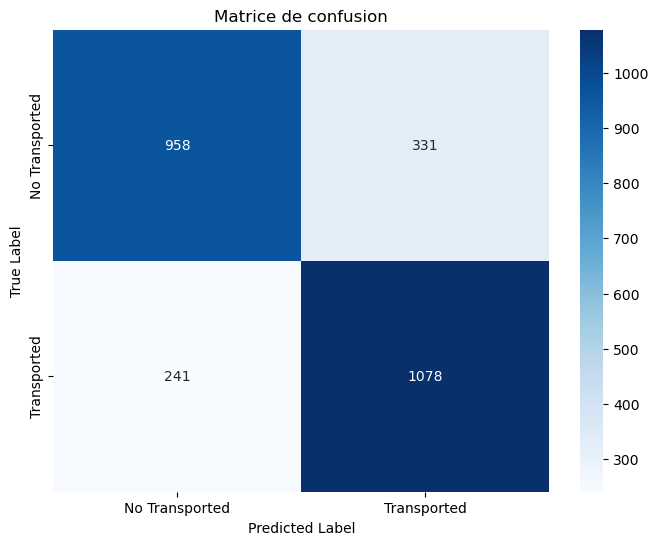

In [597]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Transported', 'Transported'], yticklabels=['No Transported', 'Transported'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de confusion')
plt.show()